In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import SwitchingCoordination as sc
import numpy as np
from tqdm import tqdm

from importlib import reload
reload(sc)
# %load_ext autoreload
# %autoreload 2

<module 'SwitchingCoordination' from 'c:\\Users\\sarap\\OneDrive\\Dokumente\\Studium\\8_SOSE_2023\\switching_coordination\\SwitchingCoordination.py'>

The threshold of a standard error of 0.005 is reached at n_mc = 230-1000.
The threshold of a standard error of 0.005 is reached at n_mc = 310-1000.
The threshold of a standard error of 0.005 is reached at n_mc = 280-1000.
The threshold of a standard error of 0.005 is reached at n_mc = 400-1000.
The threshold of a standard error of 0.005 is reached at n_mc = 280-1000.


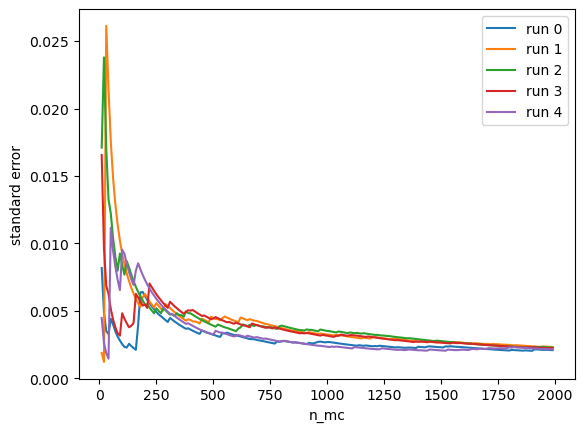

In [18]:
n_mc_reps = 2000

out_data = {}
params = sc.InitParams(N=5, switchingRate=0.3, refTime=1.0)

for g in range(5):
    for mc_iter in np.arange(n_mc_reps):
        
        #perform a single simulation
        out_data_tmp = sc.SingleSimulation(params)
        out_data[mc_iter] = out_data_tmp

    random_sampling_arr = [10]*200
    sample = np.empty(0)
    sample_arr = []
    sample_avg_arr = []
    minvals = []
    maxvals = []
    std_arr = []

    threshold = 0.005

    for i, number in enumerate(random_sampling_arr):
        sample = np.concatenate((sample, np.random.choice(out_data[i]['order'], number)), axis=None)
        sample_avg_arr.append(np.mean(sample))
        minvals.append(np.mean(sample)-np.std(sample))
        maxvals.append(np.mean(sample)+np.std(sample))
        std_arr.append(np.std(sample))

    xaxisarr = np.arange(0,2000,10)
    expected = np.mean(sample_avg_arr[-200:])
    avg_error_arr = [abs(expected-x) for x in sample_avg_arr[:]]
    cv_arr = [s/x for s,x in zip(std_arr[:],sample_avg_arr[:])] # coeffitient of variation
    std_mean_err = [s/np.sqrt(n) for s,n in zip(std_arr[1:],xaxisarr[1:])]

    for i_zahl, zahl in enumerate(std_mean_err):
        if zahl < threshold:
            zaehler += 1
            if zaehler == 100:
                print(f'The threshold of a standard error of {threshold} is reached at n_mc = {xaxisarr[(i_zahl-100)]}.')
        elif (zahl >= threshold, zaehler > 0):
            zaehler = 0            
    
    plt.plot(xaxisarr[1:],std_mean_err, label=f'run {g}')

plt.xlabel('n_mc')
plt.ylabel('standard error')
plt.legend()
#plt.savefig(f'results/n_mc_2.png', bbox_inches='tight')

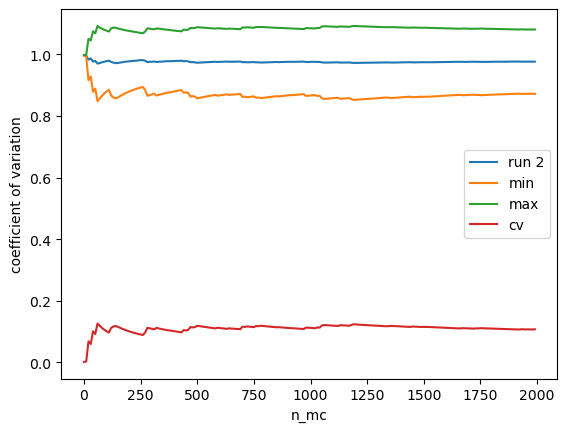

In [17]:
plt.plot(xaxisarr,sample_avg_arr, label=f'run {g}')
plt.plot(xaxisarr,minvals, label=f'min')
plt.plot(xaxisarr,maxvals, label=f'max')
plt.plot(xaxisarr, cv_arr, label='cv')
plt.xlabel('n_mc')
plt.ylabel('coefficient of variation')
plt.legend()

C:\Users\sarap\AppData\Local\Temp\ipykernel_6964\4142679094.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  std_mean_arr = [s/np.sqrt(x) for s,x in zip(std_arr[:],xaxisarr[:])]


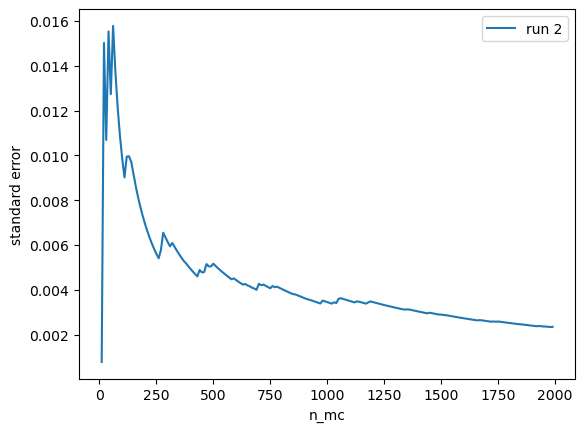

In [18]:
std_mean_arr = [s/np.sqrt(x) for s,x in zip(std_arr[:],xaxisarr[:])]
plt.plot(xaxisarr,std_mean_arr, label=f'run {g}')
plt.xlabel('n_mc')
plt.ylabel('standard error')
plt.legend()

In [32]:
auflistung = [1,4,3,5,6,2,3,3.4,2,1.4,1.1,0.9,0.7,0.4,0.2,0.1,0.09,0.08,0.07,0.09,0.03,0.04,0.02,0.1,0.08,0.07,0.06,0.05,0.03,0.02,0.01,0.02,0.001]
threshold = 0.1
zaehler = 0
for i_zahl, zahl in enumerate(auflistung):
    if zahl < threshold:
        zaehler += 1
        if zaehler == 8:
            print(f'Ab {auflistung[(i_zahl-8)]}, also bei i_zahl = {i_zahl-8}, wurde die Schwelle für 8 Zählungen nicht überschritten.')
    elif (zahl > threshold, zaehler > 0):
        zaehler = 0


Ab 0.1, also bei i_zahl = 23, wurde die Schwelle für 8 Zählungen nicht überschritten.


In [20]:
(230+310+280+400+280)/5

300.0